Importaciones necesarias

In [43]:
import math
import csv
import random
import matplotlib.pyplot as plt
import numpy as np


Obtención del contenido del archivo

In [44]:
x = []
y = []
t = []

from google.colab import drive
drive.mount('/content/drive')

# Guardar los datos en arrays
with open('/content/drive/My Drive/Path_SRA.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        row = row[0].split()
        x.append(float(row[0]))
        y.append(float(row[1]))
        t.append(float(row[2]))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Funciones utilizadas


In [65]:
def calcular_velocidades(x, y, t):
  v = [ math.dist([x[1], y[1]], [x[0], y[0]]) / (t[1]-t[0]) ] # d_d/d_t
  w = [ 0 ] # Velocidad inicial
  theta0 = 0 # Angulo inicial

  for i in range(1, len(x)):
    # Cambio del tiempo
    d_t = t[i] - t[i-1]

    # Velocidad lineal
    v1 = distance([x[i-1], y[i-1]], [x[i], y[i]]) /d_t # Distancia / cambio tiempo
    v.append(v1)

    # Velocidad angular
    theta1 = angle([x[i-1],y[i-1]], [x[i],y[i]]) # Nueva posición angular
    d_theta = theta1 - theta0 # Cambio de posición angular
    omega = d_theta / d_t # Cambio angular / cambio tiempo
    theta0 = theta1 # Actualización posición angular
    w.append(omega)


  return v, w

def distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def angle(p1, p2):
  return math.atan2(p2[1] - p1[1], p2[0] - p1[0])

def calcular_trayectoria(p0, theta0, v, w):
    # Posición inicial
    path = [p0]

    # Calcular trayectoria
    for i in range(1, len(v)):
        # Cambio de tiempo
        d_t = t[i] - t[i-1]

        # Calcular nueva posición
        x = p0[0] + v[i] * np.cos(theta0 + w[i] * d_t) # x(t)=x+v⋅cos(θ+ω⋅t)
        y = p0[1] + v[i] * np.sin(theta0 + w[i] * d_t) # y(t)=x+v⋅sen(θ+ω⋅t)

        # Calcular nueva orientación
        theta0 = angle(p0, [x,y])

        p0 = [x, y]
        # Actualizar trayectoria
        path.append(p0)

    return path


def calcular_trayectoria_err_lineal(p0, theta0, v, w):
    # Inicializar variables
    path = [p0]

    # Calcular trayectoria
    for i in range(1, len(v)):
        d_t = t[i] - t[i-1]

        # Calcular nuevo error gaussiano con media nula
        media = v[i]
        desviacion = 0.01 * media # 1% de la media de la velocidad lineal
        error = random.gauss(0, desviacion) # desviación típica igual al 1% de la media de la velocidad lineal

        # Calcular nueva velocidad lineal con error gaussiano
        v_error = media + error

        # Calcular nueva posición y orientación
        x = p0[0] + v_error * np.cos(theta0 + w[i] * d_t)
        y = p0[1] + v_error * np.sin(theta0 + w[i] * d_t)

        theta0 = angle(p0, [x,y])
        p0 = [x, y]
        # Actualizar trayectoria
        path.append(p0)

    return path

def calcular_trayectoria_err_angular(p0, theta0, v, w):
    # Inicializar variables
    path = [p0]

    # Calcular trayectoria
    for i in range(1, len(v)):
        d_t = t[i] - t[i-1]

        # Calcular nuevo error gaussiano con media nula
        desviacion_angular = 0.01 * abs(w[i])  # 1% del valor absoluto de la velocidad angular
        error_angular = random.gauss(0, desviacion_angular)

        # Calcular nueva velocidad angular con error gaussiano
        w_error = w[i] + error_angular

        # Calcular nueva posición y orientación
        x = p0[0] + v[i] * np.cos(theta0 + w_error * d_t)
        y = p0[1] + v[i] * np.sin(theta0 + w_error * d_t)

        theta0 = angle(p0, [x,y])
        p0 = [x, y]
        # Actualizar trayectoria
        path.append(p0)

    return path


In [66]:
# Calcular velocidades
v, w = calcular_velocidades(x, y, t)

# Máximos de velocidad lineal
maxv = max(v)
vx = x[v.index(maxv)]
vy = y[v.index(maxv)]

# Máximos de velocidad angular
maxw = max(w)
wx = x[w.index(maxw)]
wy = y[w.index(maxw)]


Mostrar los datos resultantes:

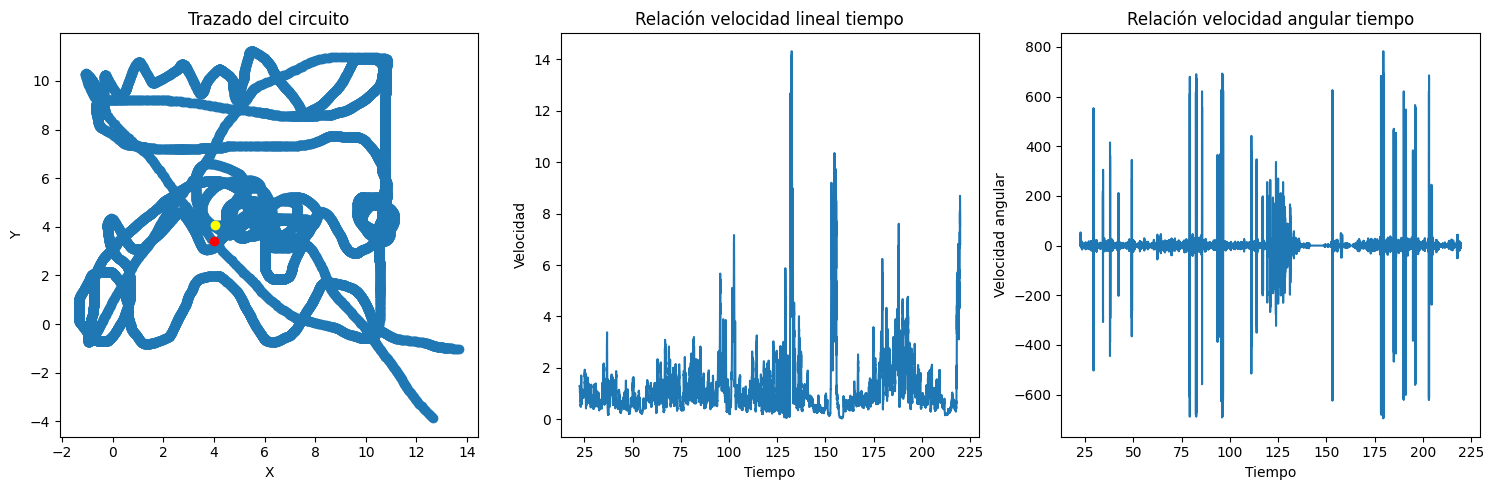

El punto amarillo indica el punto con máxima velocidad angular y el punto rojo la máxima velocidad lineal
Velocidad lineal media: 1.4744807178618677 m/s
Velocidad angular media: -0.052604144545079244 rad/s


In [67]:
# Distribución de los gráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Dibujo del circuito
axs[0].scatter(x, y, zorder=2)
axs[0].plot(x, y, zorder=1)
axs[0].scatter(vx, vy, color='red', zorder=3)
axs[0].scatter(wx, wy, color='yellow', zorder=3)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('Trazado del circuito')

# Gráfico de la velocidad lineal
axs[1].plot(t, v)
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Velocidad')
axs[1].set_title('Relación velocidad lineal tiempo')

# Gráfico de la velocidad angular
axs[2].plot(t, w)
axs[2].set_xlabel('Tiempo')
axs[2].set_ylabel('Velocidad angular')
axs[2].set_title('Relación velocidad angular tiempo')

plt.tight_layout()
plt.show()

print("El punto amarillo indica el punto con máxima velocidad angular y el punto rojo la máxima velocidad lineal")
print("Velocidad lineal media:", sum(v)/len(v), "m/s")
print("Velocidad angular media:",  sum(w)/len(w), "rad/s")

In [71]:
print(x[0],y[0],x[1],y[1])

13.689 -1.035 13.616 -1.026


# Trayectoria y velocidades
El primer gráfico nos muestra la trayectoria que ha realizado el robot. El punto amarillo indica el punto con máxima velocidad angular y el rojo el de máxima velocidad lineal. Creo que dedbe haber algun error en el calculo de velocidades angulares puesto que sería más razonable que el punto con mayor velocidad angular fuese aquel que tuviese un gran cambio en la direción de la trayectoria del robot y a simple vista no parece que el punto amarillo encaje con esas caracteristicas. En cambio, el punto rojo si puede ser correcto.

# Información útil
Una característica útil es los puntos máximos de velocidad ya nombrados con anterioridad.También, concidero importante saber como se modifica la velocidad por ello se han realizado dos gráficos nos muestran un diagrama relación tiempo velocidad. El primero muestra la velocidad lineal y el segundo la angular. La media de las velocidades también es una información util.


Velocidad lineal media: 1.4744807178618677 m/s


Velocidad angular media: -0.052604144545079244 rad/s


Al igual que el punto inicial y el final de la trayectoria.

Coordenadas iniciales = (13.689 -1.035)

Coordenadas finales = 13.616 -1.026


Calculo de las trayectorias:

In [68]:
start_point = [x[0],y[0]]
start_angle = math.atan2(y[1] - y[0], x[1] - x[0])

# Calcular trayectoria sin error
path = calcular_trayectoria(start_point, start_angle, v, w)
xr = [x for x, _ in path]
yr = [y for _, y in path]

# Calcular trayectoria con error lineal
path_error_v = calcular_trayectoria_err_lineal(start_point, start_angle, v, w)
xr_error_v = [x for x, _ in path_error_v]
yr_error_v = [y for _, y in path_error_v]

# Calcular trayectoria con error angular
path_error_w = calcular_trayectoria_err_angular(start_point, start_angle, v, w)
xr_error_w = [x for x, _ in path_error_w]
yr_error_w = [y for _, y in path_error_w]

Mostrar los datos resultantes:

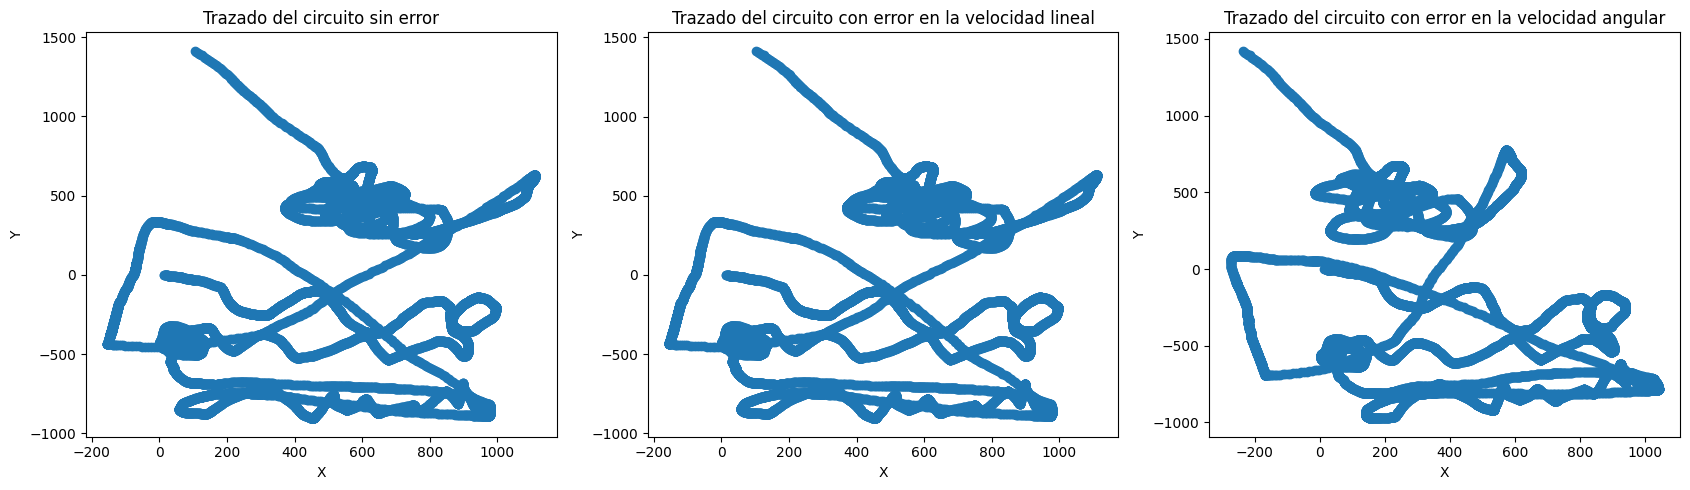

In [69]:
# Distribución de los gráficos
fig, axs = plt.subplots(1, 3, figsize=(17, 5))
# Dibujo del circuito sin error
axs[0].scatter(xr, yr, zorder=2)
axs[0].plot(xr, yr, zorder=1)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('Trazado del circuito sin error')

# Dibujo del circuito con error en la velocidad lineal
axs[1].scatter(xr_error_v, yr_error_v, zorder=2)
axs[1].plot(xr_error_v, yr_error_v, zorder=1)
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title('Trazado del circuito con error en la velocidad lineal')

# Dibujo del circuito con error en la velocidad angular
axs[2].scatter(xr_error_w, yr_error_w, zorder=2)
axs[2].plot(xr_error_w, yr_error_w, zorder=1)
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
axs[2].set_title('Trazado del circuito con error en la velocidad angular')

plt.tight_layout()
plt.show()

# Trazado del circuito sin error
La primera gráfica muestra la trayectoria original como se puede observar debe de haber algún error de calculo ya sea en el calculo de velocidades o en el de la trayectoria puesto que la trayectoria original y la recreada son notoriamente muy distintas. He intentado encontrar el error pero no lo cosigó encontrar. Yo creo que es algún fallo relacionado con los angulos porque aunque he leído sobre como calcularlos no tengo realmente claro si las formulas matematicas aplicadas son las adecuadas.

# Trazado del circuito con error lineal
La función que genera el trazado con error lineal genera un error gaussiano y se le suma a la velocidad lineal v[i] para obtener v_error. Sin embargo, este error es muy pequeño en comparación con la velocidad lineal por tanto la trayectoria con error sea muy similar a la trayectoria sin error.

Además, como se está utilizando una desviación estándar que es el 1% de la velocidad lineal para generar el error gaussiano. Esto significa que el 68% de los errores generados estarán dentro del 1% de la velocidad lineal, lo que podría ser muy pequeño.

# Trazado del circuito con error angular
La función con error angular con respecto a la que carese de este grafican el mismo trayecto pero debido al error angular la gráfica con error es la original con una pequeña rotación.